# ⚾ Baseball

## 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [1]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

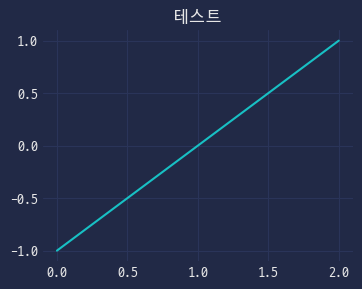

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

## 📦 데이터 준비

In [3]:
hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
hitter3 = pd.read_csv('data/2014_hitter.csv')

# hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
# hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
# hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [4]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [5]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

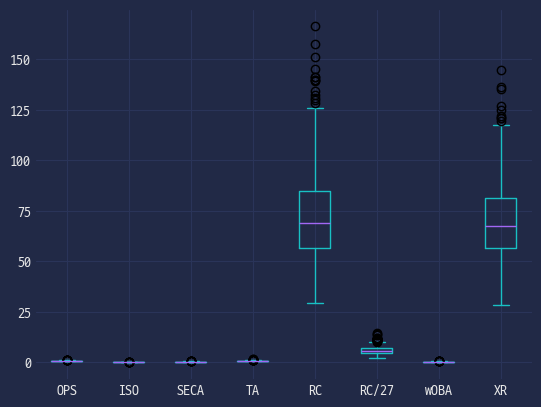

In [6]:
# 데이터 분포 확인
X.plot(kind='box')
plt.show()

In [7]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,:] = scaler.fit_transform(X)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133


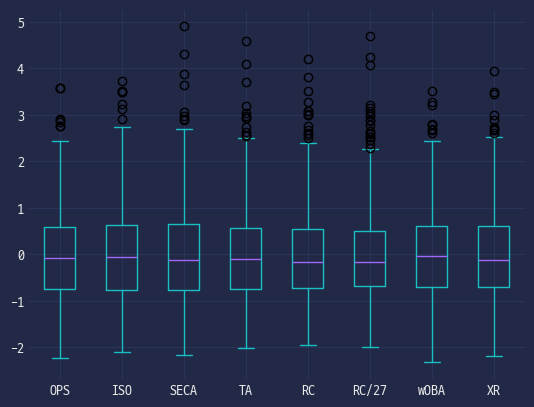

In [8]:
X.plot(kind='box')
plt.show()

## 📏 K-Means 군집화

In [9]:
features = pd.DataFrame(X)

### 🦾 Elbow 기법으로 최적의 K 찾기

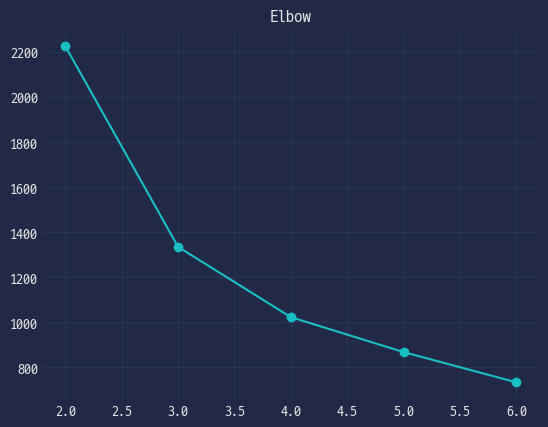

In [10]:
from sklearn.cluster import KMeans

# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
inertias = []
for i in range(2, 7):
    km = KMeans(i, random_state=42)
    km.fit(features)
    inertias.append(km.inertia_)

# sns.lineplot(x=list(range(2, 7)), y=inertias)
plt.plot(range(2, 7), inertias, marker='o')
plt.title('Elbow')
plt.show()

### 📏 K-Means 군집화 수행

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,0
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1


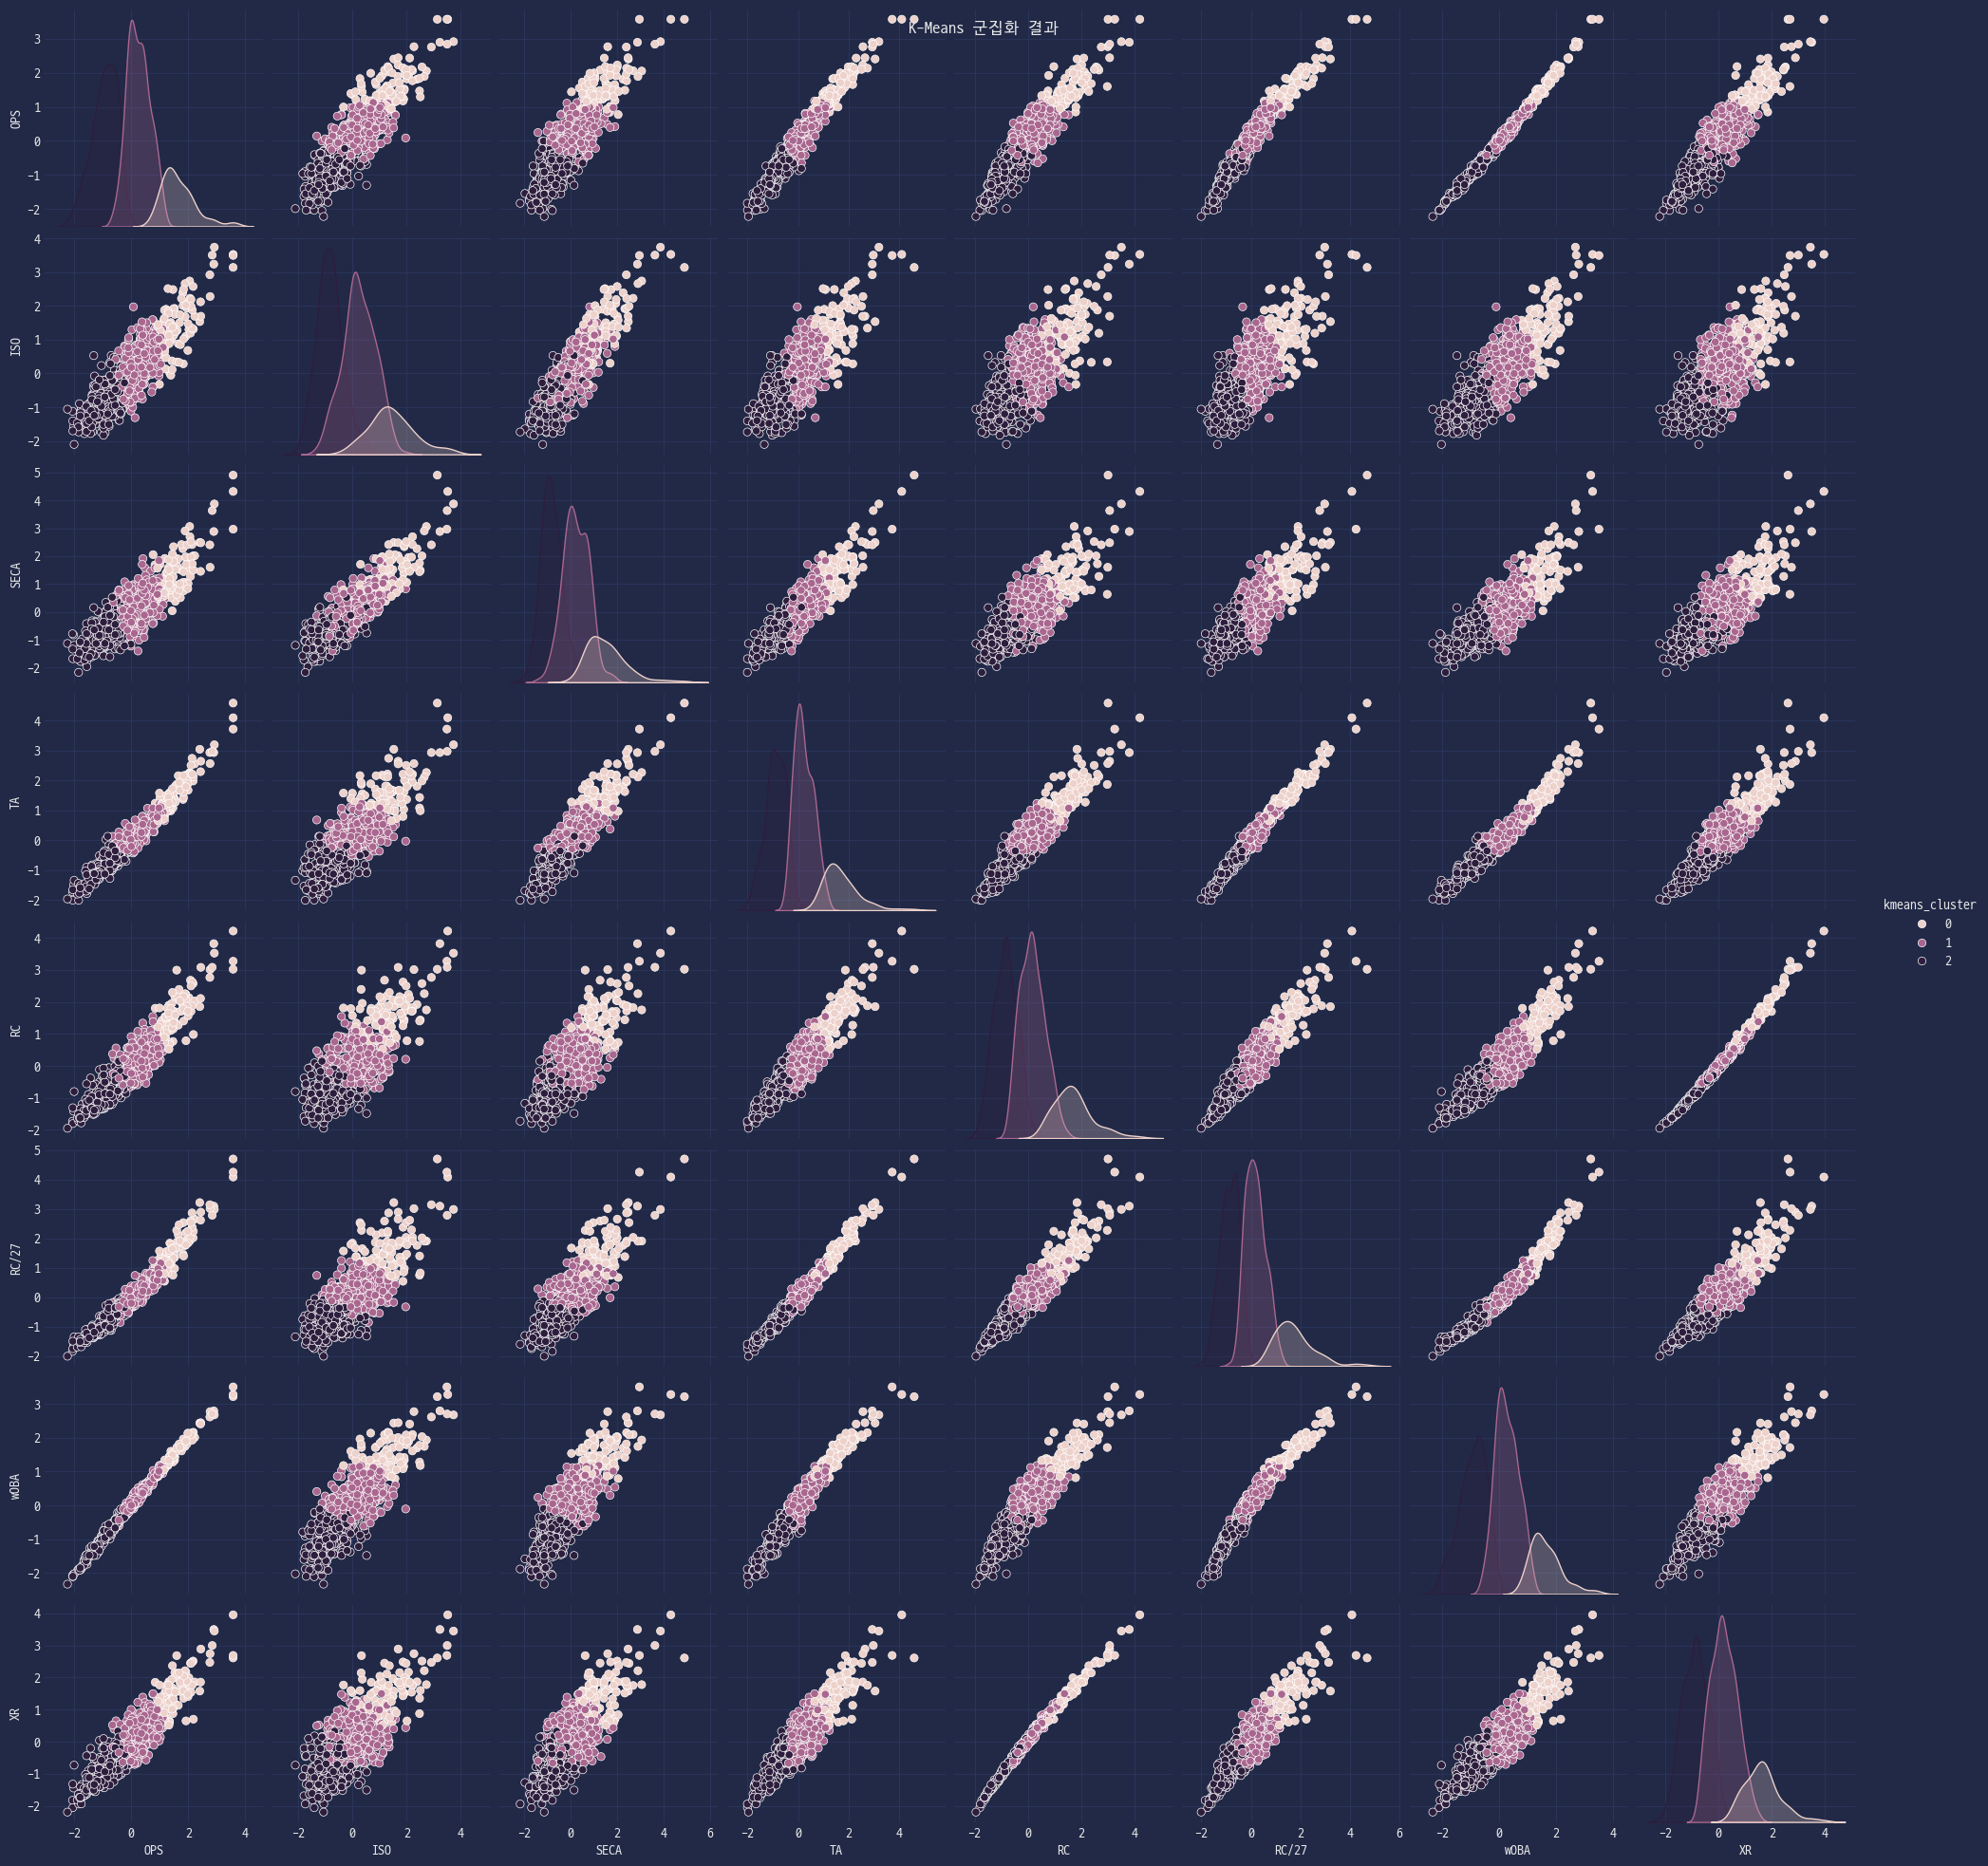

In [11]:
# 클러스터링 객체 생성
km = KMeans(n_clusters=3, random_state=42)
# km = KMeans(random_state=42)

# 학습 및 클러스터링 결과 예측
kmeans_cluster = km.fit_predict(features)
features['kmeans_cluster'] = kmeans_cluster
display(features.head(3))

# 군집 중심점
# km.cluster_centers_

# 군집화 결과 시각화
sns.pairplot(data=features, hue='kmeans_cluster')
plt.suptitle('K-Means 군집화 결과')

plt.show()

### 〽️ 실루엣 분석

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

# 평균 실루엣 계수
print(f'평균 실루엣 계수: {silhouette_score(features, kmeans_cluster)}')

# 개별 데이터 실루엣 계수 컬럼 추가
features['silhouette'] = silhouette_samples(features, kmeans_cluster)
features.head(3)

평균 실루엣 계수: 0.46290466649159756


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.147556
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,0,0.574739
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.334465


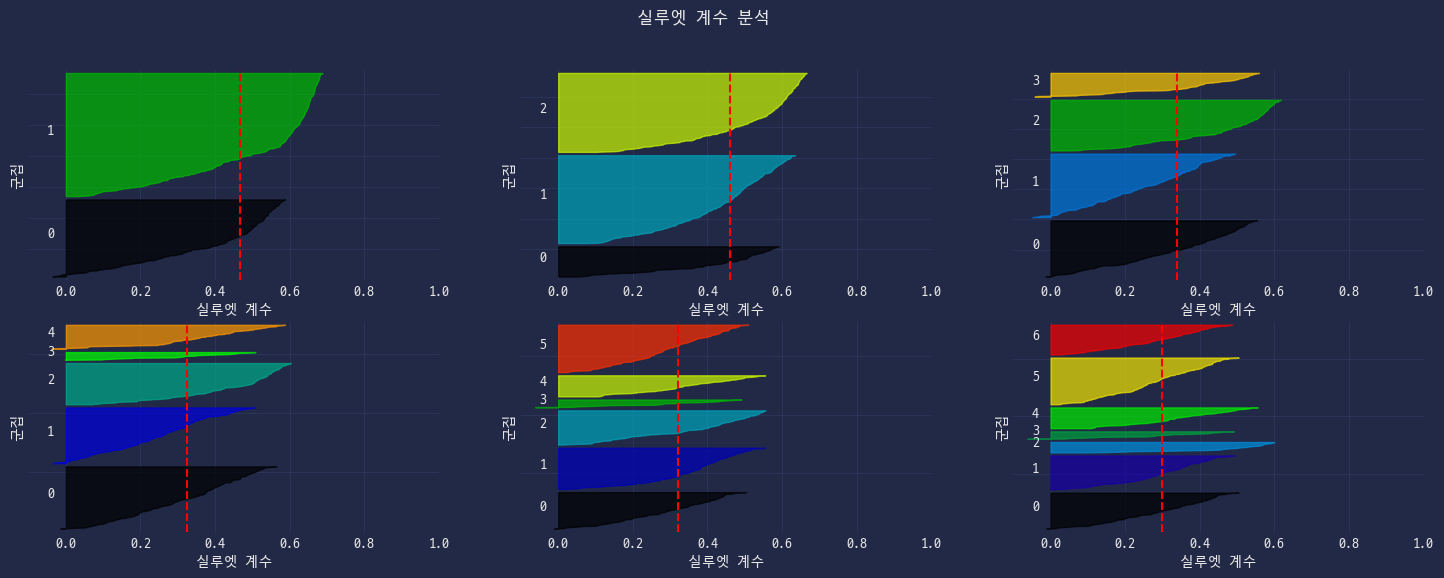

In [13]:
from silhouette_analysis import silhouette_plot

# 최적의 실루엣 찾기
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 6)
for k in range(2, 8):
    ax_k = ax[(k - 2) // 3][(k - 2) % 3]
    ax_k.tick_params('y', labelleft=False)
    silhouette_plot(features, k, ax_k)
    
fig.suptitle('실루엣 계수 분석')
plt.show()

### 📑 군집화 결과 분석

In [14]:
# 분석을 위한 데이터프레임 생성

df = pd.DataFrame(features, columns=features.columns)
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.147556
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,0,0.574739
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.334465
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,0,0.592744
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.353262


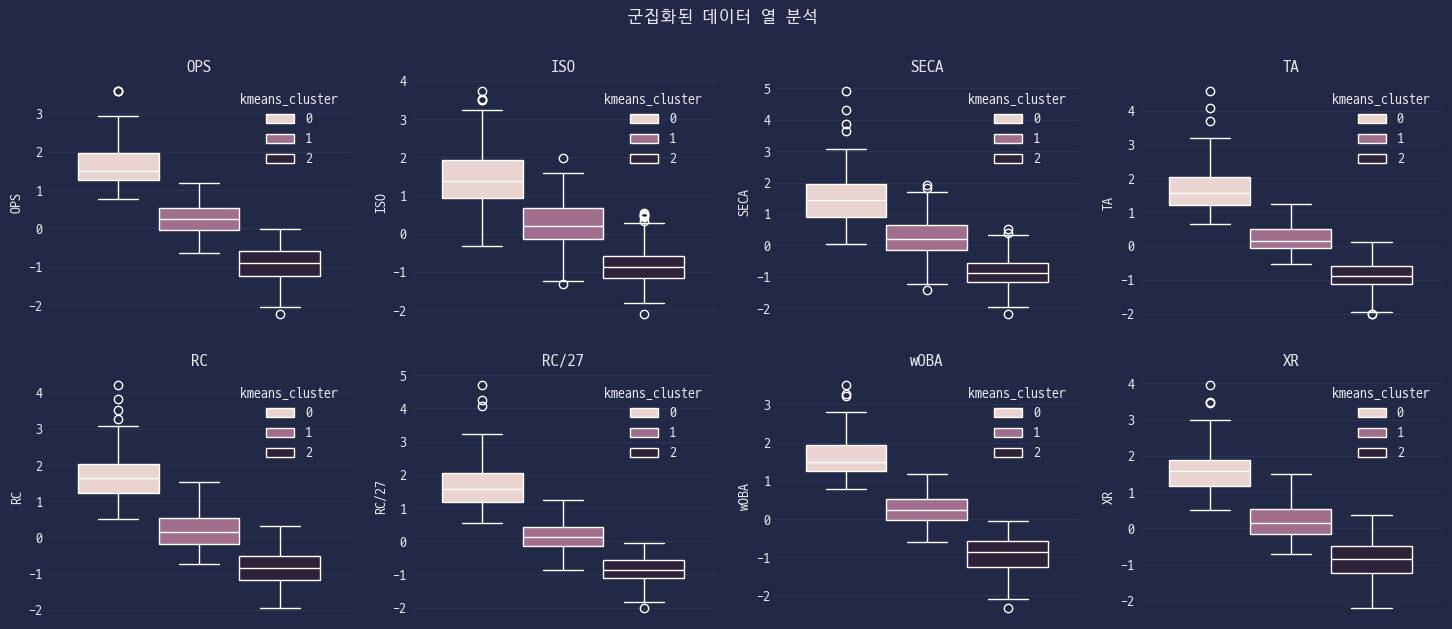

In [15]:
# 군집의 데이터 특징 분석

cols = df.columns[:-2]

plt.figure(figsize=(18, 7))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, y=col, hue='kmeans_cluster', linecolor='white')
    plt.title(col)
plt.suptitle('군집화된 데이터 열 분석')
plt.show()

In [16]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette'] < 0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette


In [17]:
# 클러스터 별 중심 player
df['player'] = y

max_idx = df.groupby('kmeans_cluster')['silhouette'].rank()[:3]
df.loc[max_idx, ['player', 'kmeans_cluster']]

,player,kmeans_cluster
16,2000마해영,1
93,2002김동주,0
69,2001김종국,2


## 🗜️ 주성분 분석 및 압축
데이터의 차원을 축소하는 방법.
군집화랑은 관계가 없지만 실습하는 김에 같이 해보았다.

In [18]:
from sklearn.decomposition import PCA

# 모든 특성(컬럼)에 대해 주성분 계산을 수행해 각 데이터포인트를 주성분 공간으로 변환
pca = PCA()
principal_components = pca.fit_transform(features)
principal_components

array([[ 2.48184096, -1.31183639, -0.1770488 , ...,  0.09469854,
        -0.05611568, -0.00203732],
       [ 5.01838346, -0.32361956,  0.03634767, ...,  0.04357644,
        -0.04990919,  0.00504027],
       [ 2.06131345, -0.44685365, -0.79481378, ...,  0.02005042,
        -0.04961003, -0.02573205],
       ...,
       [-0.32718493,  0.69517134,  0.13710512, ...,  0.07651589,
        -0.01523699,  0.05332139],
       [-4.00990195, -0.41744564,  0.26563089, ..., -0.10812378,
         0.01013247,  0.00660965],
       [-3.41833526,  0.22893314, -0.13617896, ..., -0.03794794,
         0.02086259, -0.02319132]], shape=(649, 10))

In [19]:
# 컬럼별 설명된 분산 비율 확인
display(pca.explained_variance_ratio_)

# 누적 분산 비율 확인
display(pca.explained_variance_ratio_.cumsum())

array([0.89823754, 0.04759589, 0.02058347, 0.01752148, 0.01009167,
       0.00312352, 0.00202993, 0.00050446, 0.00017176, 0.00014028])

array([0.89823754, 0.94583342, 0.96641689, 0.98393838, 0.99403005,
       0.99715357, 0.9991835 , 0.99968796, 0.99985972, 1.        ])

In [20]:
# 2개의 주성분 추출
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
principal_components

array([[ 2.48184096, -1.31183639],
       [ 5.01838346, -0.32361956],
       [ 2.06131345, -0.44685365],
       ...,
       [-0.32718493,  0.69517134],
       [-4.00990195, -0.41744564],
       [-3.41833526,  0.22893314]], shape=(649, 2))

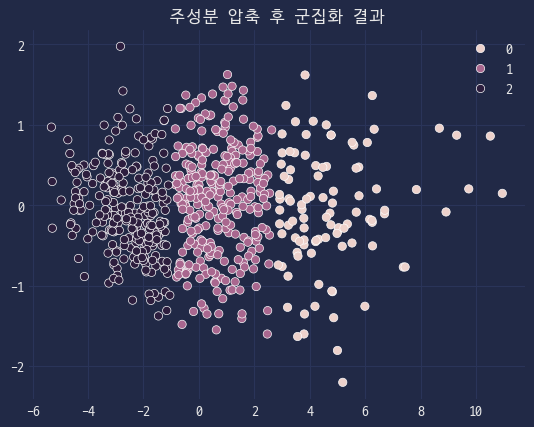

In [21]:
# 주성분으로 군집화
km = KMeans(n_clusters=3, random_state=42)
kmeans_cluster = km.fit_predict(principal_components)

# 군집 결과 시각화
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=kmeans_cluster);
plt.title('주성분 압축 후 군집화 결과')
plt.show()

평균 실루엣 계수: 0.5145102968076287


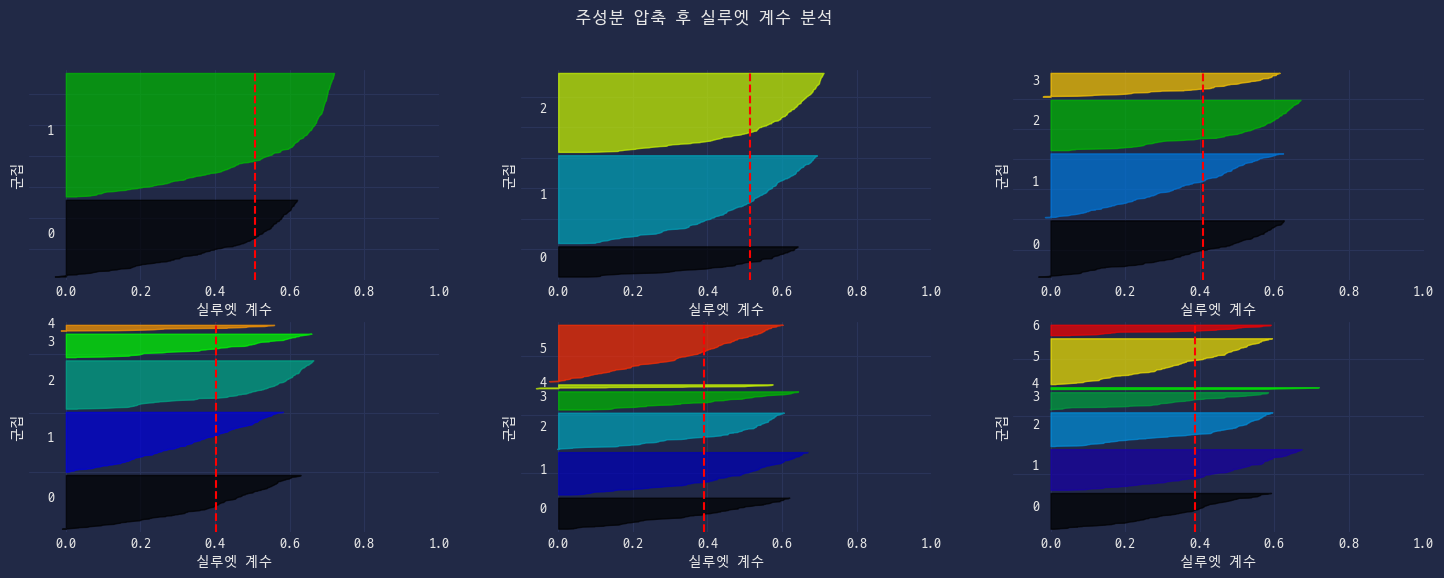

In [23]:
# 실루엣 분석
print(f'평균 실루엣 계수: {silhouette_score(principal_components, kmeans_cluster)}')

fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 6)
for k in range(2, 8):
    ax_k = ax[(k - 2) // 3][(k - 2) % 3]
    ax_k.tick_params('y', labelleft=False)
    silhouette_plot(principal_components, k, ax_k)
    
fig.suptitle('주성분 압축 후 실루엣 계수 분석')
plt.show()